# Análisis de Encuestas Stack Overflow Developer Survey (2023-2025)

Este notebook analiza los datos de las encuestas anuales de Stack Overflow sobre desarrolladores de software, enfocándose en lenguajes de programación y tendencias del sector.

Stack Overflow realiza su encuesta anual a desarrolladores principalmente en los meses de junio y julio, y publica los resultados poco después, generalmente en julio y agosto. Por ejemplo, la encuesta de 2025 se lanzó a finales de julio de 2025 y la de 2024 se publicó en el mismo período del año anterior.

## Índice
    1. Carga de Datos,
    2. Exploración Inicial,
    3. Análisis de Lenguajes de Programación,
    4. Comparación entre Años,
    5. Visualizaciones y Conclusiones


## 1. Configuración e Importación de Librerías

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de visualizaciones (TEMA CLARO para presentaciones)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

%matplotlib inline

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')

# Configuración de gráficos (MÁS GRANDES para presentaciones)
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos de las Encuestas

In [34]:
# Definir rutas de archivos
data_paths = {
  '2023': 'data/developer-survey-2023/survey_results_public.csv',
  '2024': 'data/developer-survey-2024/survey_results_public.csv',
  '2025': 'data/developer-survey-2025/survey_results_public.csv',
}
# data_paths = {
#     '2025': './2025.csv',
#     '2024': './2024.csv',
#     '2023': './2023.csv',
# }
# Cargar los datos de cada año

# Elegir las columnas que vamos a manejar
columnas_a_manejar = [
  "Age", "Employment",
  "WorkExp", "DevType",
  "OrgSize", "Industry",
  "RemoteWork", "Country",
  "Currency", "CompTotal",
  'YearsCode',
  "DatabaseHaveWorkedWith",
  "PlatformHaveWorkedWith",
  "WebframeHaveWorkedWith",
  "OpSysProfessional use",
  # Lenguajes
  "LanguageHaveWorkedWith", "LanguageWantToWorkWith",
]
# LanguageHaveWorkedWith	LanguageWantToWorkWith LanguageAdmired (separados por ;)
df_sin_filtrar = {}
df = {}
df_original = {}

for year, path in data_paths.items():
  try:
    df_original[year] = pd.read_csv(path, low_memory=False)
    df[year] = df_original[year][columnas_a_manejar]

  except FileNotFoundError:
    print(f"⚠️ Archivo {year} no encontrado: {path}")

  except Exception as e:
    print(f"❌ Error al cargar {year}: {e})")
    print(f"📊 Total de años cargados: {len(df)}")

df_sin_filtrar = df.copy()

## 3. Exploración Inicial de Datos

In [35]:
# Funciones útiles
def separator(texto=""):
  print(f"\n{'=' * 45}\n{texto}\n{'=' * 45}")


def restaurar_datos():
  global df
  df = df_sin_filtrar.copy()


# Para acceder a los datos del data frame, ordenado en un diccionario,
# debemos referirnos al año correspondiente
def lectura_de_datos(data_frame_dict=df):
  for year, data_frame in data_frame_dict.items():
    print(f"\nDATA FRAME CORRESPONDIENTE AL AÑO {year}:")
    separator("Número de filas y columnas:")
    print(data_frame.shape)
    separator("Información:")
    data_frame.info()
    separator("Dataframe:")
    display(data_frame.head(5))
    separator("FIN DEL AÑO")

In [36]:

print("Data frame original: ")
lectura_de_datos(df_original)

separator()

print("Data frame a utilizar: ")
lectura_de_datos(df)


Data frame original: 

DATA FRAME CORRESPONDIENTE AL AÑO 2023:

Número de filas y columnas:
(89184, 84)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end


FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2024:

Número de filas y columnas:
(65437, 114)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Dataframe:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa


FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2025:

Número de filas y columnas:
(49123, 170)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Columns: 170 entries, ResponseId to JobSat
dtypes: float64(50), int64(1), object(119)
memory usage: 63.7+ MB

Dataframe:


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na


FIN DEL AÑO


Data frame a utilizar: 

DATA FRAME CORRESPONDIENTE AL AÑO 2023:

Número de filas y columnas:
(89184, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     89184 non-null  object 
 1   Employment              87898 non-null  object 
 2   WorkExp                 43579 non-null  float64
 3   DevType                 76872 non-null  object 
 4   OrgSize                 65043 non-null  object 
 5   Industry                36774 non-null  object 
 6   RemoteWork              73810 non-null  object 
 7   Country                 87973 non-null  object 
 8   Currency                65334 non-null  object 
 9   CompTotal               48225 non-null  float64
 10  YearsCode               87435 non-null  object 
 11  DatabaseHaveWorkedWith  73435 non-null  object 
 12  PlatformH

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",10.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,"Information Services, IT, Software Development...",Remote,United States of America,USD\tUnited States dollar,285000.0,18,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,MacOS;Windows;Windows Subsystem for Linux (WSL),HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...
2,45-54 years old,"Employed, full-time",23.0,"Developer, back-end","5,000 to 9,999 employees","Information Services, IT, Software Development...","Hybrid (some remote, some in-person)",United States of America,USD\tUnited States dollar,250000.0,27,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,MacOS;Other Linux-based,Bash/Shell (all shells);Go,Haskell;OCaml;Rust
3,25-34 years old,"Employed, full-time",7.0,"Developer, front-end",100 to 499 employees,NaN,"Hybrid (some remote, some in-person)",United States of America,USD\tUnited States dollar,156000.0,12,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,iOS;iPadOS;MacOS,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",6.0,"Developer, full-stack",20 to 99 employees,Other,Remote,Philippines,PHP\tPhilippine peso,1320000.0,6,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Other (Please Specify):,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript



FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2024:

Número de filas y columnas:
(65437, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Employment              65437 non-null  object 
 2   WorkExp                 29658 non-null  float64
 3   DevType                 59445 non-null  object 
 4   OrgSize                 47480 non-null  object 
 5   Industry                28858 non-null  object 
 6   RemoteWork              54806 non-null  object 
 7   Country                 58930 non-null  object 
 8   Currency                46684 non-null  object 
 9   CompTotal               33740 non-null  float64
 10  YearsCode               59869 non-null  object 
 11  DatabaseHaveWorkedWith  50254 non-null  object 
 12  PlatformHaveWorkedWith  42366 non-n

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,Under 18 years old,"Employed, full-time",NaN,NaN,NaN,NaN,Remote,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,"Employed, full-time",17.0,"Developer, full-stack",NaN,NaN,Remote,United Kingdom of Great Britain and Northern I...,NaN,NaN,20,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,MacOS,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,45-54 years old,"Employed, full-time",NaN,Developer Experience,NaN,NaN,Remote,United Kingdom of Great Britain and Northern I...,NaN,NaN,37,Firebase Realtime Database,Google Cloud,ASP.NET CORE,Windows,C#,C#
3,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",NaN,NaN,NaN,Canada,NaN,NaN,4,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",NaN,NaN,NaN,Norway,NaN,NaN,9,PostgreSQL;SQLite,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python



FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2025:

Número de filas y columnas:
(49123, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     49123 non-null  object 
 1   Employment              48277 non-null  object 
 2   WorkExp                 42844 non-null  float64
 3   DevType                 43636 non-null  object 
 4   OrgSize                 34144 non-null  object 
 5   Industry                33607 non-null  object 
 6   RemoteWork              33747 non-null  object 
 7   Country                 35402 non-null  object 
 8   Currency                35402 non-null  object 
 9   CompTotal               24839 non-null  float64
 10  YearsCode               43000 non-null  float64
 11  DatabaseHaveWorkedWith  25528 non-null  object 
 12  PlatformHaveWorkedWith  24234 non-n

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,25-34 years old,Employed,8.0,"Developer, mobile",20 to 99 employees,Fintech,Remote,Ukraine,EUR European Euro,52800.0,14.0,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,Windows;MacOS;Android;iOS;iPadOS,Bash/Shell (all shells);Dart;SQL,Dart
1,25-34 years old,Employed,2.0,"Developer, back-end",500 to 999 employees,Retail and Consumer Services,"Hybrid (some in-person, leans heavy to flexibi...",Netherlands,EUR European Euro,90000.0,10.0,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,MacOS,Java,Java;Python;Swift
2,35-44 years old,"Independent contractor, freelancer, or self-em...",10.0,"Developer, front-end",NaN,Software Development,NaN,Ukraine,UAH Ukrainian hryvnia,2214000.0,12.0,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,MacOS,Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript
3,35-44 years old,Employed,4.0,"Developer, back-end","10,000 or more employees",Retail and Consumer Services,Remote,Ukraine,EUR European Euro,31200.0,5.0,NaN,Amazon Web Services (AWS);Google Cloud,Spring Boot,Windows;Ubuntu,Java;Kotlin;SQL,Java;Kotlin
4,35-44 years old,"Independent contractor, freelancer, or self-em...",21.0,Engineering manager,NaN,Software Development,NaN,Ukraine,USD United States dollar,60000.0,22.0,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Windows;Ubuntu;Debian,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript



FIN DEL AÑO


### Exploración de variables categóricas y numéricas

In [37]:
# Contando las frecuencias de valores únicos
for year, data_frame in df.items():
  separator(f"Frecuencia en el año {year}")
  print(data_frame.nunique())
  print("-"*60)
  print(f"\nContador de los primeros 5 valores más repetidos en 'Currency'\n")
  print(data_frame.Currency.value_counts().head())
  print("-"*60)
  print(f"\nContador de últimos 5 valores menos repetidos en 'Age'\n")
  print(data_frame.Age.value_counts(ascending=True).head())
  print("-"*60)
  print(f"\nContador de los primeros 5 valores más repetidos en 'DevType'\n")
  print(data_frame.DevType.value_counts().head())
  print("-"*60)



Frecuencia en el año 2023
Age                           8
Employment                  106
WorkExp                      51
DevType                      33
OrgSize                      10
Industry                     12
RemoteWork                    3
Country                     185
Currency                    144
CompTotal                  3828
YearsCode                    52
DatabaseHaveWorkedWith    11096
PlatformHaveWorkedWith     5920
WebframeHaveWorkedWith    15144
OpSysProfessional use      2470
LanguageHaveWorkedWith    32641
LanguageWantToWorkWith    29602
dtype: int64
------------------------------------------------------------

Contador de los primeros 5 valores más repetidos en 'Currency'

Currency
EUR European Euro            17651
USD\tUnited States dollar    16729
GBP\tPound sterling           4473
INR\tIndian rupee             3615
CAD\tCanadian dollar          2647
Name: count, dtype: int64
------------------------------------------------------------

Contador de último

## 4. Limpieza y preparación de datos

### Contador de nulos y constantes para trabajar

In [38]:
#Cuenta cuántos datos vacíos hay
def contador_de_nulos(data_frame_dict):
  for year, data_frame in data_frame_dict.items():
    separator(f"Año: {year}")
    print(data_frame.isnull().sum())
    print(f"\nTotal de nulos: {data_frame.isnull().sum().sum()}")


separator("Data frame original")
contador_de_nulos(df_original)
separator()
separator("Data frame a utilizar")
contador_de_nulos(df)


Data frame original

Año: 2023
ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith 

In [39]:
# Constantes
# Eliminaremos a los menores de edad para disminuir la cantidad de nulos en los data frames
edad_que_no_vamos_a_considerar = [
  "Under 18 years old", "55-64 years old", "65 years or older", "Prefer not to say"
]

# Reemplazaremos los valores de nulos por "No especificado"
columnas_a_rellenar = ["DevType", "OrgSize", "RemoteWork", "Industry", "Country", "Employment"]

# Dejaremos los datos que tengan monedas en los valores a considerar
monedas_a_considerar = "USD|EUR"

# Dejaremos únicamente los datos de los desarrolladores
tipo_de_desarrollador = "Developer"

# Variables a analizar

variables_numericas = ['WorkExp', 'YearsCode', 'CompTotal']
variables_a_rellenar = ['OrgSize', 'RemoteWork', 'Industry', 'Country']

variables_anidadas = ['DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
                      'OpSysProfessional use', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']

# Obtener las monedas y años
monedas = monedas_a_considerar.split("|")
anios = list(df.keys())


### Filtros y remplazo de nulos personalizados

In [40]:
for year, data_frame in df.items():
  # Eliminaremos a las edades que no vamos a considerar
  data_frame = data_frame[~data_frame["Age"].isin(edad_que_no_vamos_a_considerar)]

  # Eliminaremos a los que no sean desarrolladores
  data_frame = data_frame[data_frame["DevType"].str.contains(tipo_de_desarrollador, na=False)]

  # Dejaremos solo a los que cobran con las monedas a considerar
  data_frame = data_frame[data_frame["Currency"].str.contains(monedas_a_considerar, na=False)]

  # Eliminaremos todos los desarrolladores que tengan
  #   - Menos de 1 año programando
  #   - Más de 50 años programando
  if year == "2025":
    data_frame.loc[data_frame["YearsCode"] < 1, "YearsCode"] = np.nan
    data_frame.loc[data_frame["YearsCode"] > 50, "YearsCode"] = np.nan
  else:
    # Si hay strings no numéricos, los convertiremos a float, poniendo NaN donde falle
    data_frame["YearsCode"] = pd.to_numeric(data_frame["YearsCode"], errors='coerce')
  # Ahora elimina los NaN que quedaron tras conversión
  data_frame.dropna(subset=["YearsCode"], inplace=True)

  # Dejaremos únicamente a los tengan experiencia de trabajo
  data_frame.dropna(subset=["WorkExp"], inplace=True)
  data_frame.dropna(subset=["CompTotal"], inplace=True)
  data_frame.dropna(subset=["LanguageHaveWorkedWith"], inplace=True)

  # Remplazaremos los nulos en categorías de strings por "No especificado"
  for columna in variables_a_rellenar:
    data_frame[columna] = data_frame[columna].fillna("No especificado")

  for columna in variables_anidadas:
    data_frame[columna] = data_frame[columna].fillna("Ninguno")
  # Asignamos el data frame limpio al diccionario
  df[year] = data_frame

contador_de_nulos(df)


Año: 2023
Age                       0
Employment                0
WorkExp                   0
DevType                   0
OrgSize                   0
Industry                  0
RemoteWork                0
Country                   0
Currency                  0
CompTotal                 0
YearsCode                 0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
OpSysProfessional use     0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith    0
dtype: int64

Total de nulos: 0

Año: 2024
Age                       0
Employment                0
WorkExp                   0
DevType                   0
OrgSize                   0
Industry                  0
RemoteWork                0
Country                   0
Currency                  0
CompTotal                 0
YearsCode                 0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
OpSysProfessional use     0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith

### Conversión de monedas

In [41]:
# Convertir los euros a dólares
# Tasas de cambio históricas EUR a USD (aproximadas)
tasas_cambio = { # valores del euro a dólar cuando se realizó la encuesta (junio-julio)
    '2023': 1.0999,
    '2024': 1.0830		,
    '2025': 1.1700
}

# Ver cantidad de monedas
for year in anios:
  print(f"\nMonedas en {year}:")
  print(df[year].Currency.value_counts())

# Convertir EUR a USD
for year, data_frame in df.items():
    # Crear máscara para identificar registros en EUR
    mask_eur = data_frame['Currency'] == 'EUR European Euro'

    # Convertir CompTotal de EUR a USD
    data_frame.loc[mask_eur, 'CompTotal'] = data_frame.loc[mask_eur, 'CompTotal'] * tasas_cambio[year]

    # Cambiar la moneda a USD para estos registros
    data_frame.loc[mask_eur, 'Currency'] = 'USD\tConvertido'

    print(f"Año {year}: {mask_eur.sum()} registros convertidos de EUR a USD")


Monedas en 2023:
Currency
EUR European Euro            6561
USD\tUnited States dollar    6500
Name: count, dtype: int64

Monedas en 2024:
Currency
EUR European Euro            4743
USD\tUnited States dollar    4032
Name: count, dtype: int64

Monedas en 2025:
Currency
EUR European Euro           3890
USD United States dollar    3383
Name: count, dtype: int64
Año 2023: 6561 registros convertidos de EUR a USD
Año 2024: 4743 registros convertidos de EUR a USD
Año 2025: 3890 registros convertidos de EUR a USD


### 🔍 Valores atípicos en CompTotal (Compensación Total)

En esta sección detectaremos y analizaremos outliers en la compensación total de los desarrolladores.
Compararemos las estadísticas CON y SIN outliers para entender su impacto.


#### Paso 1: Detección de Outliers

Usaremos el método IQR (Rango Intercuartílico) para identificar valores atípicos.


In [42]:
# Detectar outliers en CompTotal usando el método IQR
outliers_info = {}

for year in anios:
    # Calcular cuartiles e IQR
    Q1 = df[year]['CompTotal'].quantile(0.25)  # Q1: 25% de los datos están por debajo
    Q3 = df[year]['CompTotal'].quantile(0.75)  # Q3: 75% de los datos están por debajo
    IQR = Q3 - Q1  # IQR: Rango intercuartílico (diferencia entre Q3 y Q1)

    # Calcular límites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers (valores fuera de los límites)
    mask_outliers = (df[year]['CompTotal'] < limite_inferior) | (df[year]['CompTotal'] > limite_superior)

    # Guardar información
    outliers_info[year] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': mask_outliers.sum(),
        'pct_outliers': (mask_outliers.sum() / len(df[year])) * 100,
        'mask': mask_outliers
    }

    # Mostrar resultados
    print(f"\n{'='*60}")
    print(f"AÑO {year} - Detección de Outliers en CompTotal")
    print(f"{'='*60}")
    print(f"Q1 (25%):              ${Q1:>15,.2f}")
    print(f"Q3 (75%):              ${Q3:>15,.2f}")
    print(f"IQR (Q3-Q1):           ${IQR:>15,.2f}")
    print(f"Límite inferior:       ${limite_inferior:>15,.2f}")
    print(f"Límite superior:       ${limite_superior:>15,.2f}")
    print(f"\nOutliers detectados:   {mask_outliers.sum():>10,} ({(mask_outliers.sum()/len(df[year]))*100:.2f}%)")
    print(f"Registros normales:    {(~mask_outliers).sum():>10,} ({((~mask_outliers).sum()/len(df[year]))*100:.2f}%)")



AÑO 2023 - Detección de Outliers en CompTotal
Q1 (25%):              $      55,000.00
Q3 (75%):              $     140,000.00
IQR (Q3-Q1):           $      85,000.00
Límite inferior:       $     -72,500.00
Límite superior:       $     267,500.00

Outliers detectados:          458 (3.51%)
Registros normales:        12,603 (96.49%)

AÑO 2024 - Detección de Outliers en CompTotal
Q1 (25%):              $      51,442.50
Q3 (75%):              $     129,960.00
IQR (Q3-Q1):           $      78,517.50
Límite inferior:       $     -66,333.75
Límite superior:       $     247,736.25

Outliers detectados:          377 (4.30%)
Registros normales:         8,398 (95.70%)

AÑO 2025 - Detección de Outliers en CompTotal
Q1 (25%):              $      54,405.00
Q3 (75%):              $     135,000.00
IQR (Q3-Q1):           $      80,595.00
Límite inferior:       $     -66,487.50
Límite superior:       $     255,892.50

Outliers detectados:          304 (4.18%)
Registros normales:         6,969 (95.82%)


#### Paso 2: Crear datasets sin outliers


In [43]:
# Crear versión del dataset sin outliers
df_sin_outliers = {}
for year in anios:
    df_sin_outliers[year] = df[year][~outliers_info[year]['mask']].copy()
    print(f"Año {year}: {len(df[year]):,} → {len(df_sin_outliers[year]):,} registros (eliminados: {outliers_info[year]['n_outliers']:,})")

print("\n✅ Datasets creados:")
print("   • df[year]: CON outliers")
print("   • df_sin_outliers[year]: SIN outliers")


Año 2023: 13,061 → 12,603 registros (eliminados: 458)
Año 2024: 8,775 → 8,398 registros (eliminados: 377)
Año 2025: 7,273 → 6,969 registros (eliminados: 304)

✅ Datasets creados:
   • df[year]: CON outliers
   • df_sin_outliers[year]: SIN outliers


## Análisis

### Compensación Total (CompTotal)

#### Paso 1: Análisis Estadístico Comparativo

Usamos `.describe()` para obtener estadísticas descriptivas completas de CompTotal con y sin outliers.


In [44]:
print(f"\n{'='*80}")
print("ANÁLISIS ESTADÍSTICO COMPARATIVO: CompTotal (CON vs SIN Outliers)")
print(f"{'='*80}\n")

for year in anios:
    con_outliers = df[year]['CompTotal']
    sin_outliers = df_sin_outliers[year]['CompTotal']

    print(f"\n{'─'*80}")
    print(f"AÑO {year}")
    print(f"{'─'*80}\n")

    # Obtener estadísticas descriptivas usando .describe()
    desc_con = con_outliers.describe()  # Resumen estadístico CON outliers
    desc_sin = sin_outliers.describe()  # Resumen estadístico SIN outliers

    # Calcular métricas adicionales
    moda_con, moda_sin = None, None
    try:
        # Moda aproximada usando histogramas (valor más frecuente)
        bins = 50
        counts_con, edges_con = np.histogram(con_outliers, bins=bins)
        moda_con = (edges_con[counts_con.argmax()] + edges_con[counts_con.argmax() + 1]) / 2

        counts_sin, edges_sin = np.histogram(sin_outliers, bins=bins)
        moda_sin = (edges_sin[counts_sin.argmax()] + edges_sin[counts_sin.argmax() + 1]) / 2
    except:
        pass

    # Calcular cambios porcentuales
    cambio_count = ((desc_sin['count'] - desc_con['count']) / desc_con['count']) * 100
    cambio_mean = ((desc_sin['mean'] - desc_con['mean']) / desc_con['mean']) * 100
    cambio_std = ((desc_sin['std'] - desc_con['std']) / desc_con['std']) * 100
    cambio_median = ((desc_sin['50%'] - desc_con['50%']) / desc_con['50%']) * 100
    cambio_max = ((desc_sin['max'] - desc_con['max']) / desc_con['max']) * 100

    # Mostrar comparación en formato tabla
    print(f"{'Métrica':<25} {'CON Outliers':>20} {'SIN Outliers':>20} {'Cambio %':>12}")
    print(f"{'-'*80}")

    # Count - Número total de registros
    print(f"{'Count':<25} {desc_con['count']:>20,.0f} {desc_sin['count']:>20,.0f} {cambio_count:>11.2f}%")

    # Media - Promedio aritmético de todos los valores
    print(f"{'Media':<25} ${desc_con['mean']:>19,.2f} ${desc_sin['mean']:>19,.2f} {cambio_mean:>11.2f}%")

    # Desviación Estándar - Mide la dispersión promedio respecto a la media
    print(f"{'Desviación Estándar':<25} ${desc_con['std']:>19,.2f} ${desc_sin['std']:>19,.2f} {cambio_std:>11.2f}%")

    # Mediana (50%) - Valor que divide los datos en dos mitades iguales
    print(f"{'Mediana (Q2/P50)':<25} ${desc_con['50%']:>19,.2f} ${desc_sin['50%']:>19,.2f} {cambio_median:>11.2f}%")

    # Moda - Valor más frecuente (aproximado)
    if moda_con and moda_sin:
        cambio_moda = ((moda_sin - moda_con) / moda_con) * 100
        print(f"{'Moda (aprox.)':<25} ${moda_con:>19,.2f} ${moda_sin:>19,.2f} {cambio_moda:>11.2f}%")

    # Máximo - Valor más grande del conjunto de datos
    print(f"{'Máximo':<25} ${desc_con['max']:>19,.2f} ${desc_sin['max']:>19,.2f} {cambio_max:>11.2f}%")

    # Q1 (25%) - Primer cuartil: 25% de los datos son menores a este valor
    print(f"{'Q1 (25%)':<25} ${desc_con['25%']:>19,.2f} ${desc_sin['25%']:>19,.2f}")

    # Q3 (75%) - Tercer cuartil: 75% de los datos son menores a este valor
    print(f"{'Q3 (75%)':<25} ${desc_con['75%']:>19,.2f} ${desc_sin['75%']:>19,.2f}")

    # IQR - Rango intercuartílico (Q3-Q1): mide la dispersión del 50% central de los datos
    iqr_con = desc_con['75%'] - desc_con['25%']
    iqr_sin = desc_sin['75%'] - desc_sin['25%']
    print(f"{'IQR (Q3-Q1)':<25} ${iqr_con:>19,.2f} ${iqr_sin:>19,.2f}")

    # Rango - Diferencia entre el valor máximo y mínimo
    rango_con = desc_con['max'] - desc_con['min']
    rango_sin = desc_sin['max'] - desc_sin['min']
    cambio_rango = ((rango_sin - rango_con) / rango_con) * 100
    print(f"{'Rango (Max-Min)':<25} ${rango_con:>19,.2f} ${rango_sin:>19,.2f} {cambio_rango:>11.2f}%")

    # Coeficiente de Variación - Dispersión relativa (std/media * 100%)
    cv_con = (desc_con['std'] / desc_con['mean']) * 100
    cv_sin = (desc_sin['std'] / desc_sin['mean']) * 100
    print(f"{'Coef. Variación (%)':<25} {cv_con:>20.2f} {cv_sin:>20.2f}")

print(f"\n{'='*80}")
print("✅ Análisis estadístico completado")


ANÁLISIS ESTADÍSTICO COMPARATIVO: CompTotal (CON vs SIN Outliers)


────────────────────────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────────────────────────

Métrica                           CON Outliers         SIN Outliers     Cambio %
--------------------------------------------------------------------------------
Count                                   13,061               12,603       -3.51%
Media                     $         108,660.66 $          97,548.57      -10.23%
Desviación Estándar       $         116,386.61 $          55,820.35      -52.04%
Mediana (Q2/P50)          $          87,992.00 $          85,000.00       -3.40%
Moda (aprox.)             $          93,161.53 $          66,430.00      -28.69%
Máximo                    $       9,316,153.00 $         265,720.00      -97.15%
Q1 (25%)                  $          55,000.00 $          54,995.00
Q3 (75%)                  $         140,000

#### Paso 2: Visualizaciones Comparativas (CON vs SIN Outliers)

Gráficos lado a lado para comparar visualmente las distribuciones.


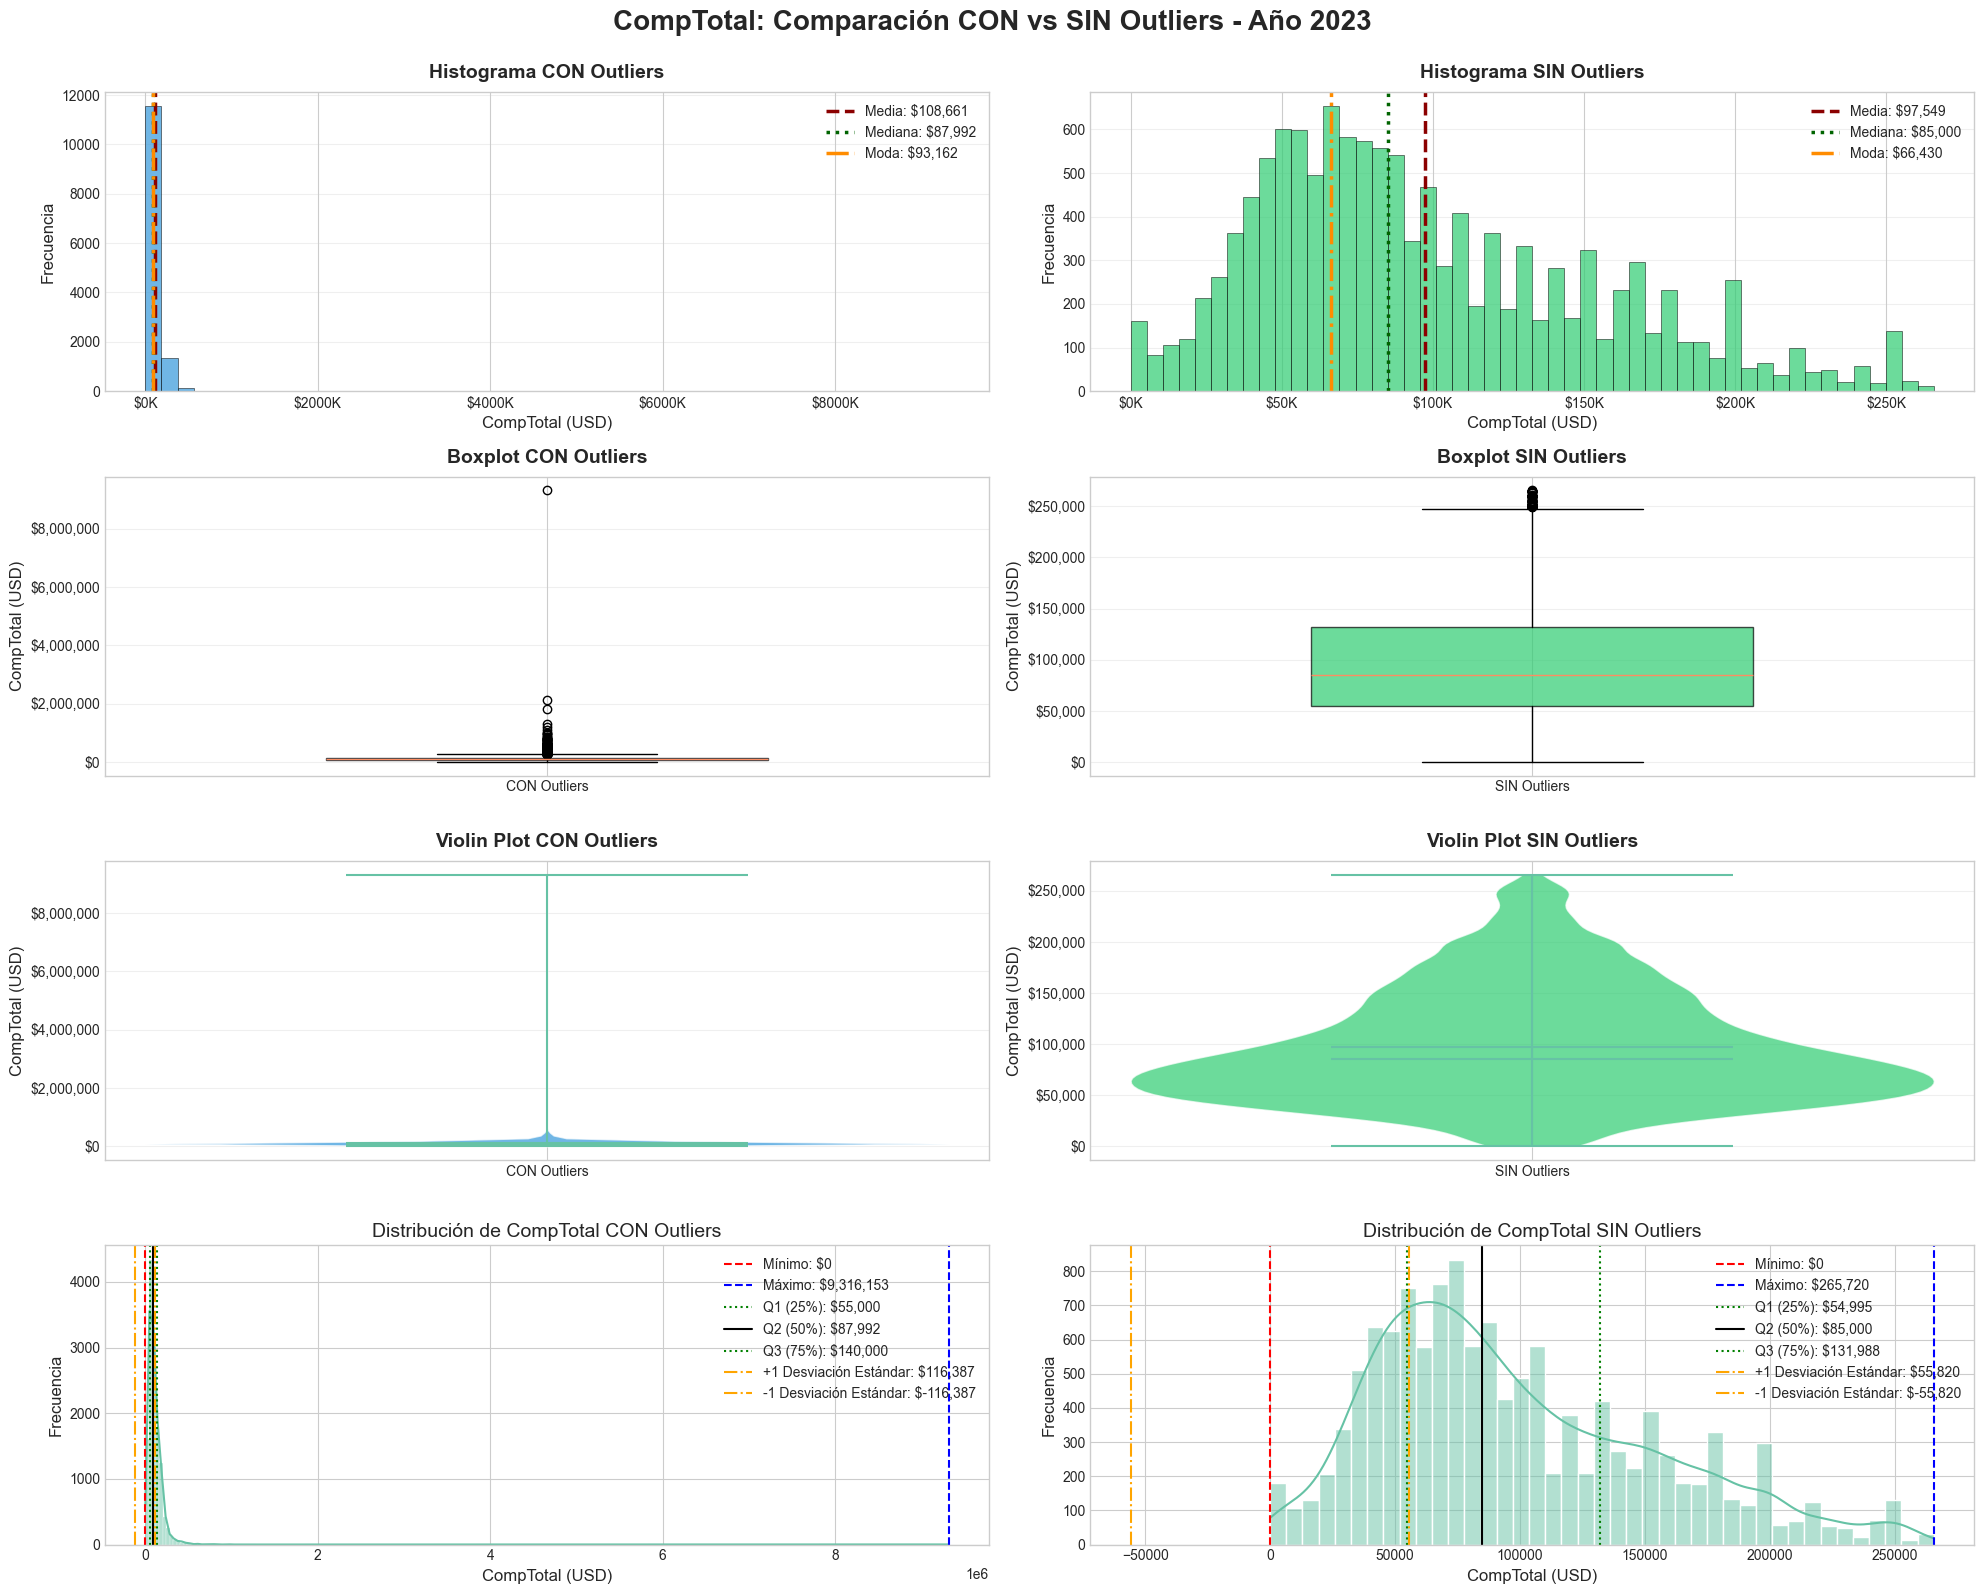


✅ Visualizaciones para el año 2023 generadas



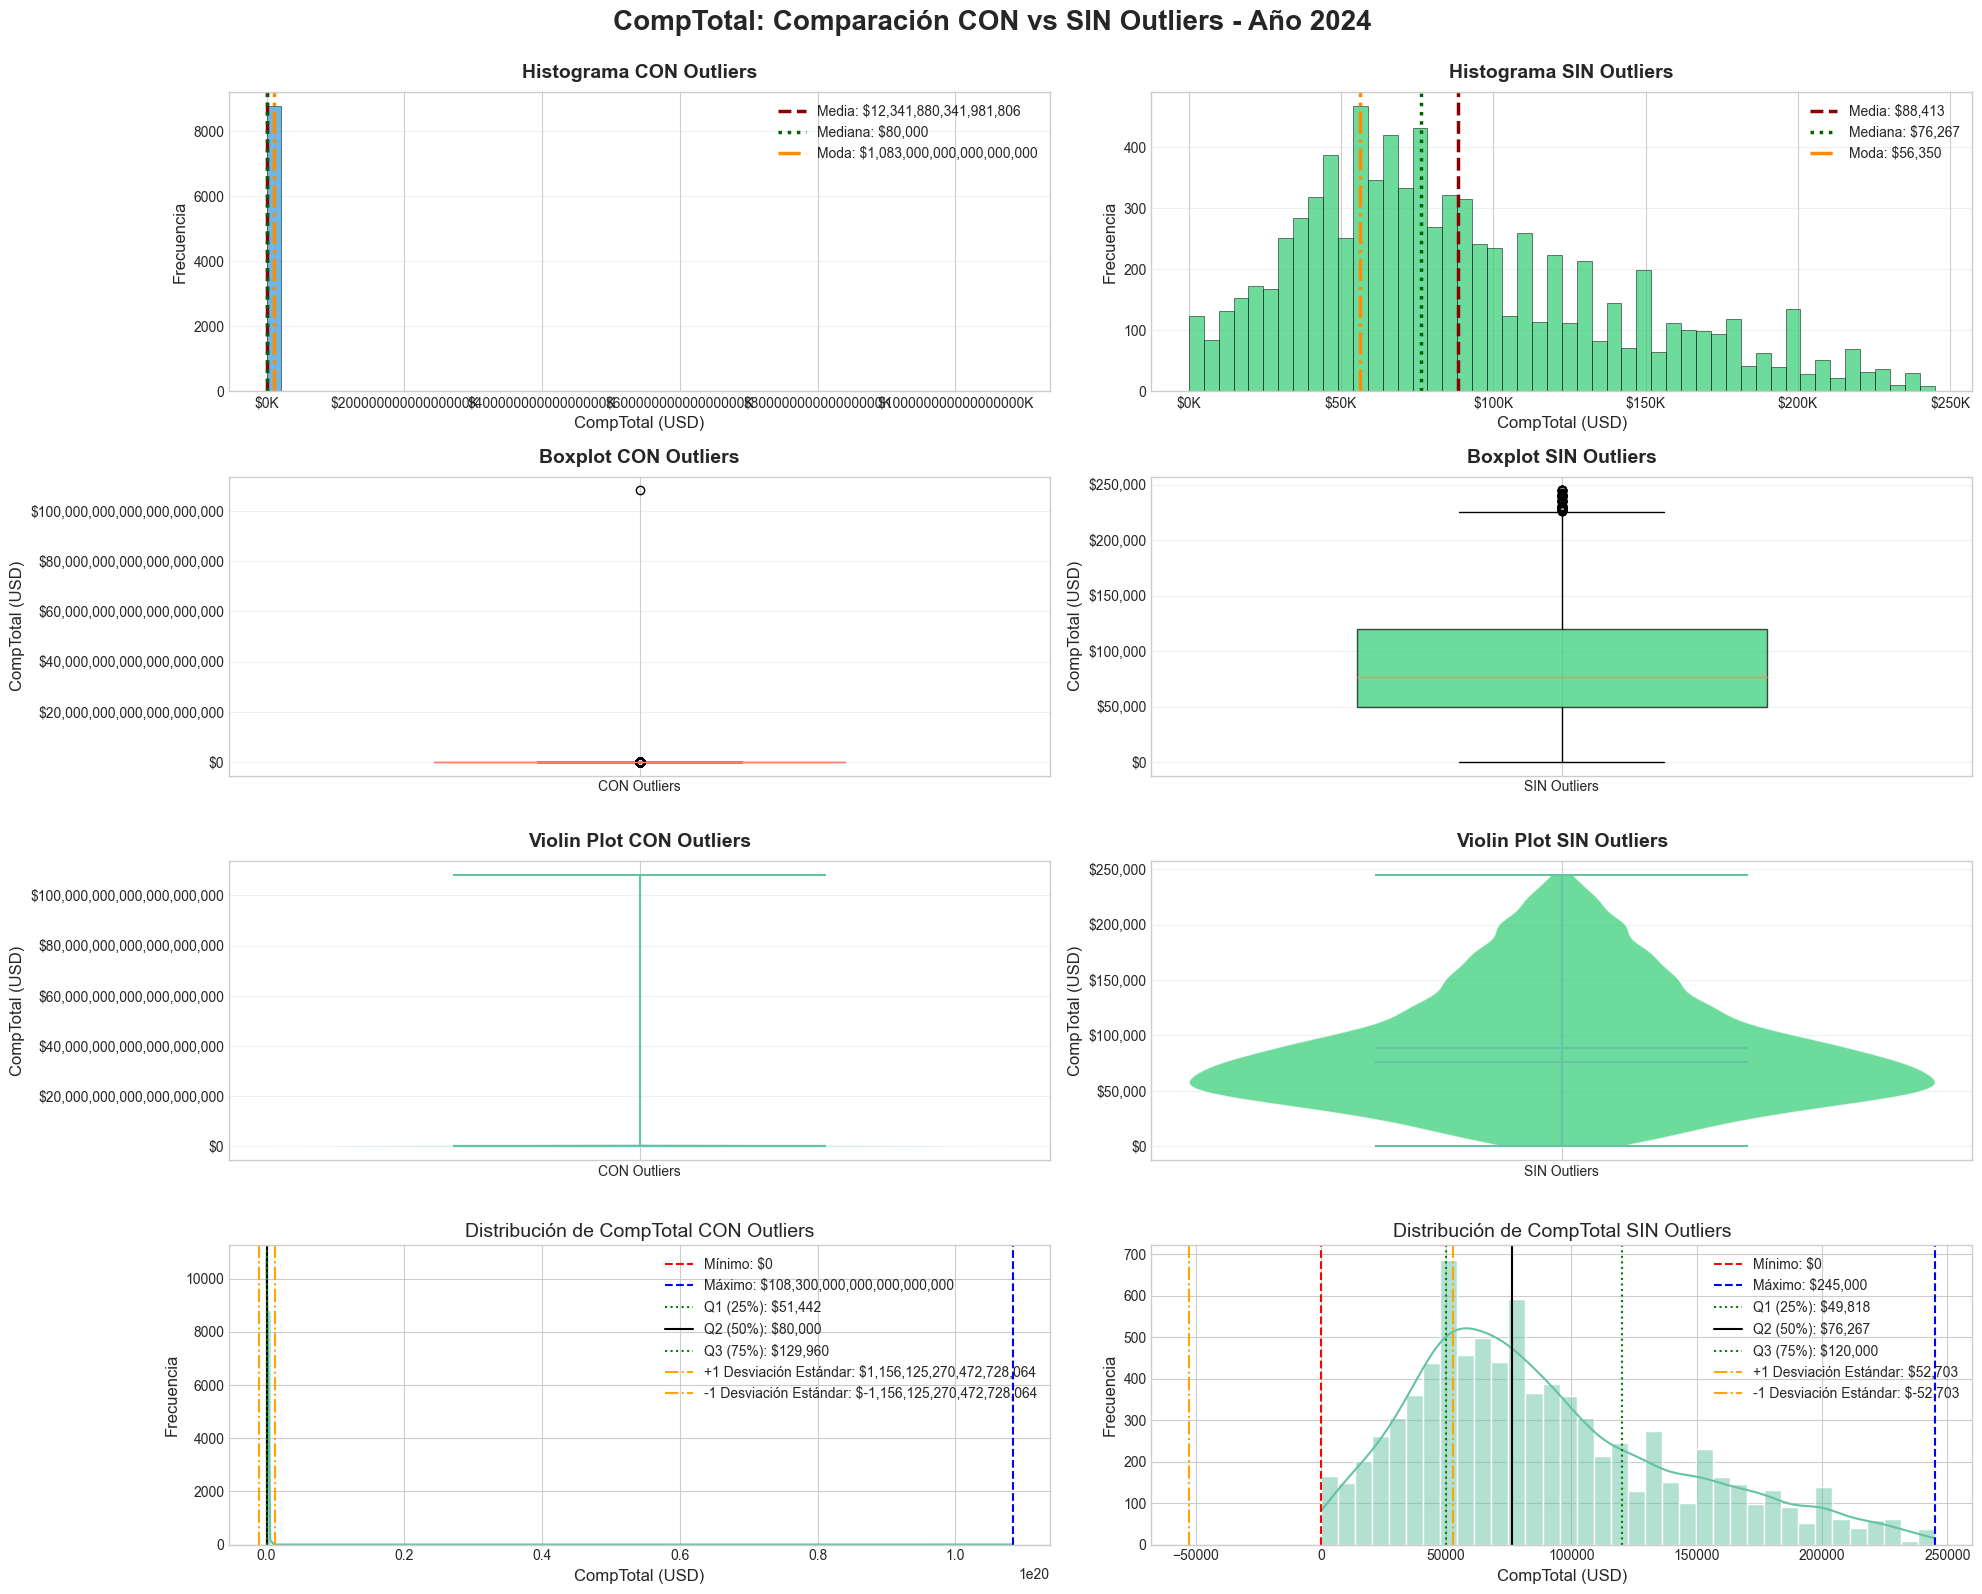


✅ Visualizaciones para el año 2024 generadas



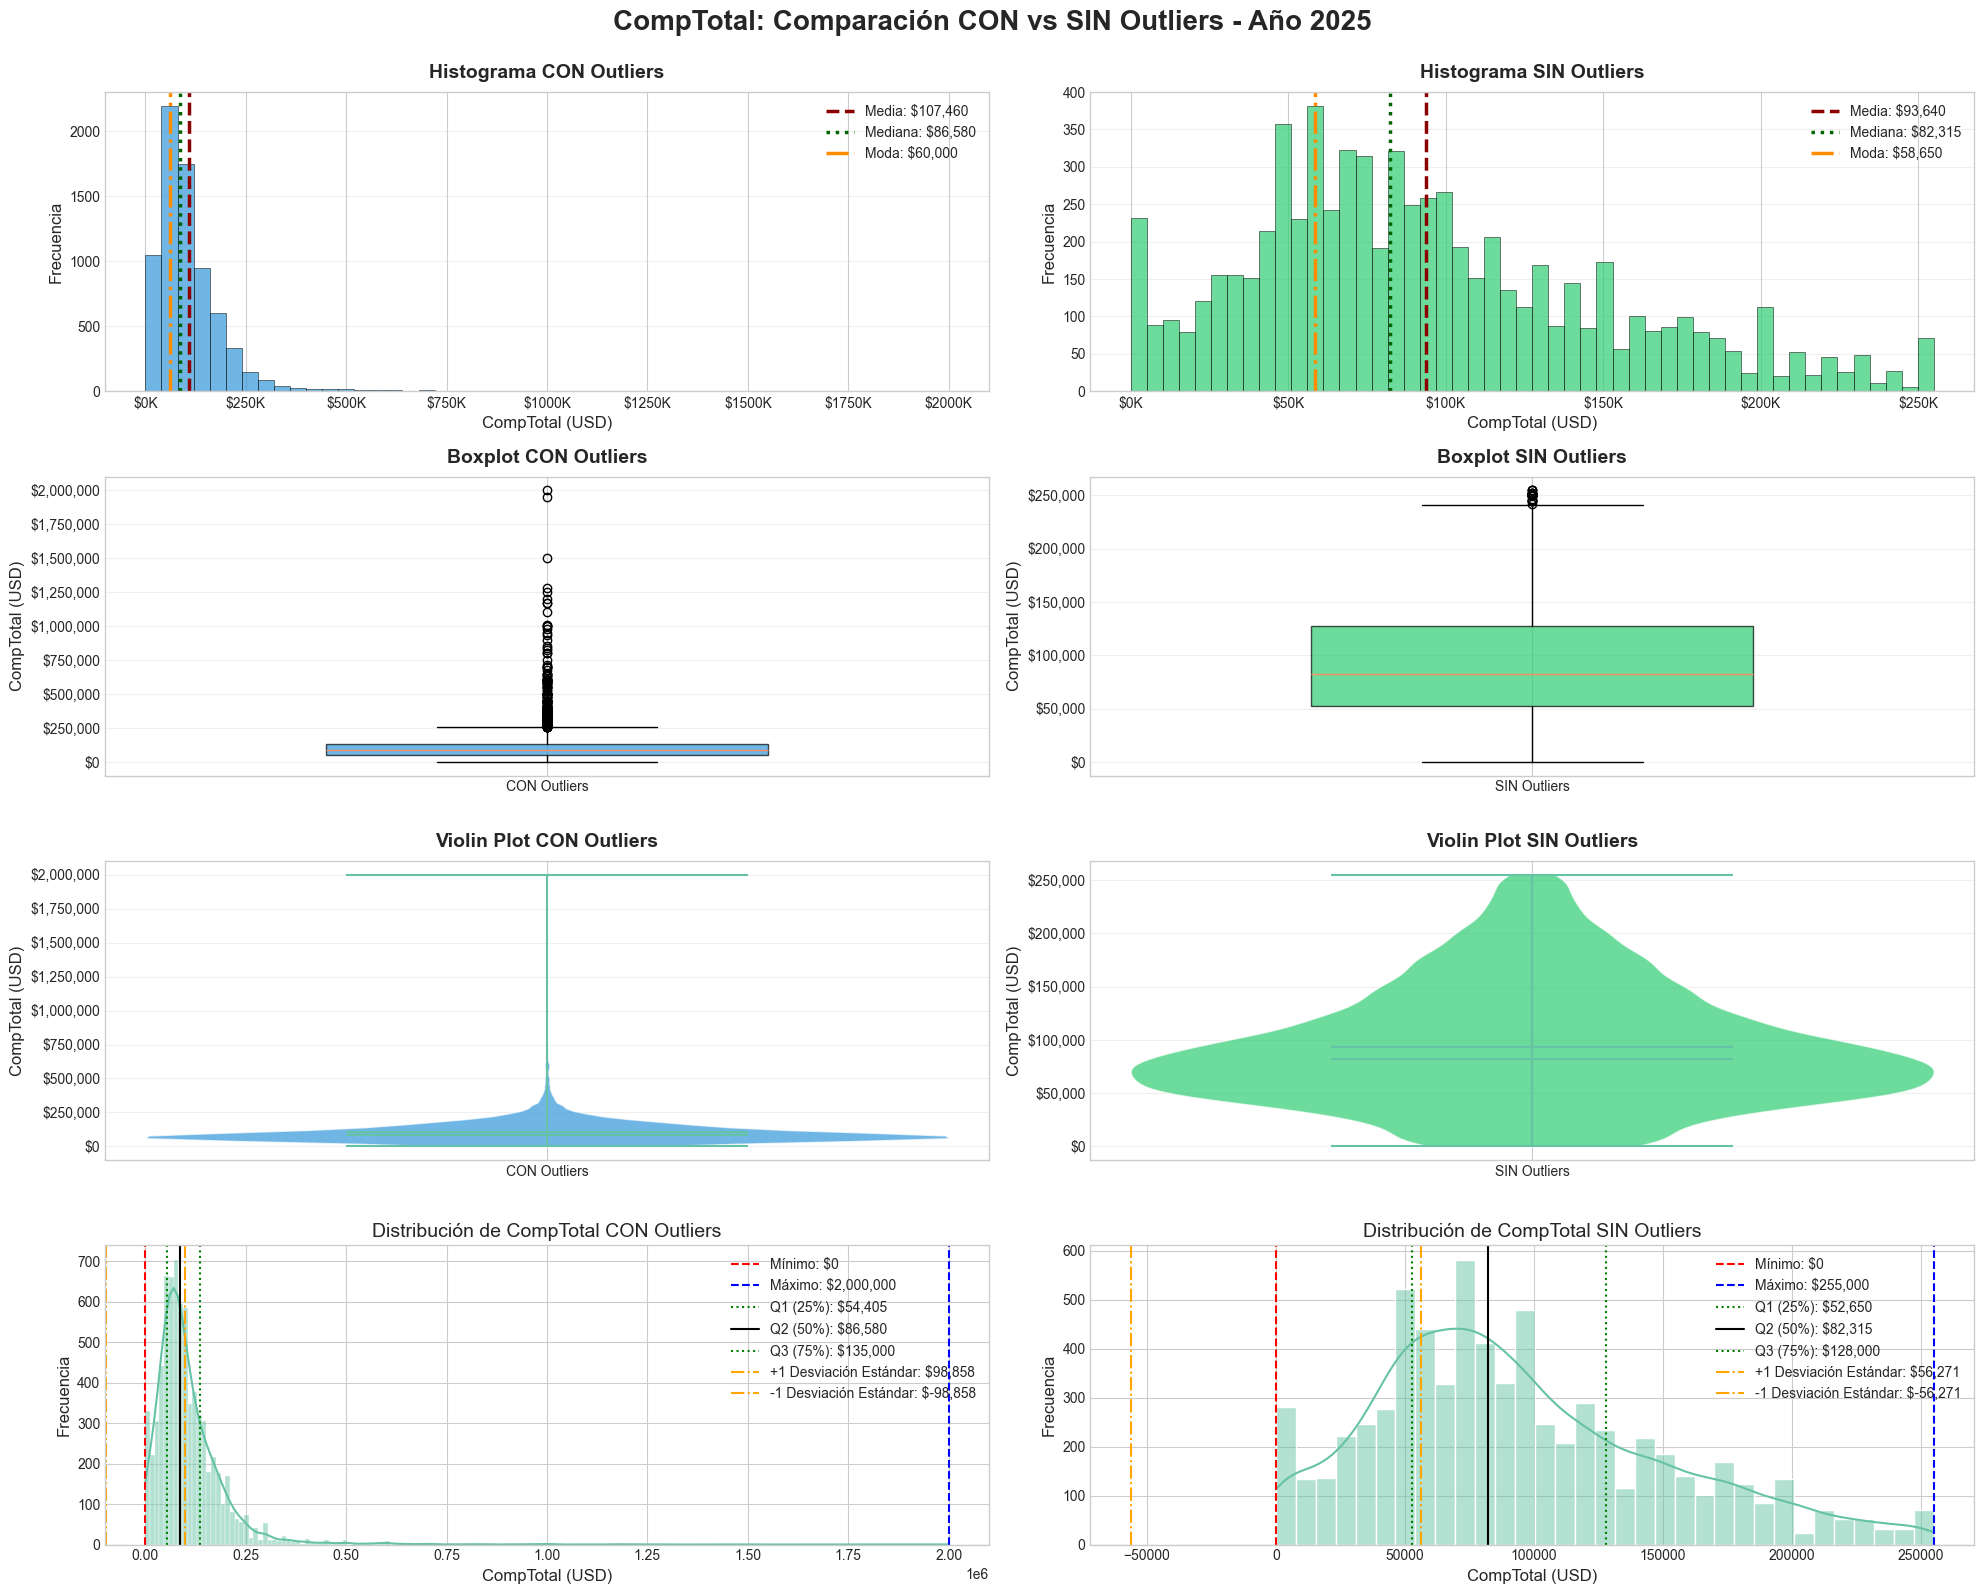


✅ Visualizaciones para el año 2025 generadas



In [45]:
# Colores para visualización
color_con = '#3498db'  # Azul para CON outliers
color_sin = '#2ecc71'  # Verde para SIN outliers

for year in anios:
    con_outliers = df[year]['CompTotal']
    sin_outliers = df_sin_outliers[year]['CompTotal']

    # Crear figura con 8 subgráficos (4x2) para comparaciones lado a lado
    fig, axes = plt.subplots(4, 2, figsize=(20, 16))
    fig.suptitle(f'CompTotal: Comparación CON vs SIN Outliers - Año {year}',
                 fontsize=20, fontweight='bold', y=0.995)

    # === FILA 1: Histogramas separados CON y SIN outliers ===
    # Histograma CON outliers
    ax1 = axes[0, 0]
    ax1.hist(con_outliers, bins=50, color=color_con, alpha=0.7, edgecolor='black', linewidth=0.5)
    # Líneas de media, mediana y moda
    ax1.axvline(con_outliers.mean(), color='darkred', linestyle='--', linewidth=2.5,
                label=f'Media: ${con_outliers.mean():,.0f}')
    ax1.axvline(con_outliers.median(), color='darkgreen', linestyle=':', linewidth=2.5,
                label=f'Mediana: ${con_outliers.median():,.0f}')
    # Calcular moda aproximada
    try:
        counts, edges = np.histogram(con_outliers, bins=50)
        moda = (edges[counts.argmax()] + edges[counts.argmax() + 1]) / 2
        ax1.axvline(moda, color='darkorange', linestyle='-.', linewidth=2.5,
                    label=f'Moda: ${moda:,.0f}')
    except:
        pass
    ax1.set_title('Histograma CON Outliers', fontsize=14, fontweight='bold', pad=10)
    ax1.set_xlabel('CompTotal (USD)', fontsize=12)
    ax1.set_ylabel('Frecuencia', fontsize=12)
    ax1.legend(loc='upper right', fontsize=10)
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

    # Histograma SIN outliers
    ax2 = axes[0, 1]
    ax2.hist(sin_outliers, bins=50, color=color_sin, alpha=0.7, edgecolor='black', linewidth=0.5)
    # Líneas de media, mediana y moda
    ax2.axvline(sin_outliers.mean(), color='darkred', linestyle='--', linewidth=2.5,
                label=f'Media: ${sin_outliers.mean():,.0f}')
    ax2.axvline(sin_outliers.median(), color='darkgreen', linestyle=':', linewidth=2.5,
                label=f'Mediana: ${sin_outliers.median():,.0f}')
    # Calcular moda aproximada
    try:
        counts, edges = np.histogram(sin_outliers, bins=50)
        moda = (edges[counts.argmax()] + edges[counts.argmax() + 1]) / 2
        ax2.axvline(moda, color='darkorange', linestyle='-.', linewidth=2.5,
                    label=f'Moda: ${moda:,.0f}')
    except:
        pass
    ax2.set_title('Histograma SIN Outliers', fontsize=14, fontweight='bold', pad=10)
    ax2.set_xlabel('CompTotal (USD)', fontsize=12)
    ax2.set_ylabel('Frecuencia', fontsize=12)
    ax2.legend(loc='upper right', fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

    # === FILA 2: Boxplots separados ===
    # Boxplot CON outliers
    ax3 = axes[1, 0]
    bp1 = ax3.boxplot([con_outliers], labels=['CON Outliers'], patch_artist=True, widths=0.5)
    bp1['boxes'][0].set_facecolor(color_con)
    bp1['boxes'][0].set_alpha(0.7)
    ax3.set_title('Boxplot CON Outliers', fontsize=14, fontweight='bold', pad=10)
    ax3.set_ylabel('CompTotal (USD)', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # Boxplot SIN outliers
    ax4 = axes[1, 1]
    bp2 = ax4.boxplot([sin_outliers], labels=['SIN Outliers'], patch_artist=True, widths=0.5)
    bp2['boxes'][0].set_facecolor(color_sin)
    bp2['boxes'][0].set_alpha(0.7)
    ax4.set_title('Boxplot SIN Outliers', fontsize=14, fontweight='bold', pad=10)
    ax4.set_ylabel('CompTotal (USD)', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # === FILA 3: Violin Plots separados ===
    # Violin Plot CON outliers
    ax5 = axes[2, 0]
    parts1 = ax5.violinplot([con_outliers], positions=[1], showmeans=True, showmedians=True, widths=0.7)
    for pc in parts1['bodies']:
        pc.set_facecolor(color_con)
        pc.set_alpha(0.7)
    ax5.set_xticks([1])
    ax5.set_xticklabels(['CON Outliers'])
    ax5.set_title('Violin Plot CON Outliers', fontsize=14, fontweight='bold', pad=10)
    ax5.set_ylabel('CompTotal (USD)', fontsize=12)
    ax5.grid(True, alpha=0.3, axis='y')
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # Violin Plot SIN outliers
    ax6 = axes[2, 1]
    parts2 = ax6.violinplot([sin_outliers], positions=[1], showmeans=True, showmedians=True, widths=0.7)
    for pc in parts2['bodies']:
        pc.set_facecolor(color_sin)
        pc.set_alpha(0.7)
    ax6.set_xticks([1])
    ax6.set_xticklabels(['SIN Outliers'])
    ax6.set_title('Violin Plot SIN Outliers', fontsize=14, fontweight='bold', pad=10)
    ax6.set_ylabel('CompTotal (USD)', fontsize=12)
    ax6.grid(True, alpha=0.3, axis='y')
    ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # === FILA 4: Histograma con kde ===
    ax7 = axes[3, 0]
    sns.histplot(con_outliers, kde=True, ax=ax7)

    # Calcular estadísticos
    min_val = con_outliers.min()
    max_val = con_outliers.max()
    q1 = con_outliers.quantile(0.25)
    q2 = con_outliers.quantile(.50)
    q3 = con_outliers.quantile(0.75)
    std_dev = con_outliers.std()

    # Marcar en el gráfico
    ax7.axvline(min_val, color='red', linestyle='--', label=f'Mínimo: ${min_val:,.0f}')
    ax7.axvline(max_val, color='blue', linestyle='--', label=f'Máximo: ${max_val:,.0f}')
    ax7.axvline(q1, color='green', linestyle=':', label=f'Q1 (25%): ${q1:,.0f}')
    ax7.axvline(q2, color='black', linestyle='-', label=f'Q2 (50%): ${q2:,.0f}')
    ax7.axvline(q3, color='green', linestyle=':', label=f'Q3 (75%): ${q3:,.0f}')
    ax7.axvline(min_val + std_dev, color='orange', linestyle='-.', label=f'+1 Desviación Estándar: ${min_val + std_dev:,.0f}')
    ax7.axvline(min_val - std_dev, color='orange', linestyle='-.', label=f'-1 Desviación Estándar: ${min_val - std_dev:,.0f}')

    # Títulos y etiquetas
    ax7.set_title("Distribución de CompTotal CON Outliers")
    ax7.set_xlabel("CompTotal (USD)")
    ax7.set_ylabel("Frecuencia")

    # Mostrar leyenda
    ax7.legend(loc='upper right', fontsize=10)

    # **Segundo gráfico (Distribución de CompTotal SIN Outliers)**
    ax8 = axes[3, 1]
    sns.histplot(sin_outliers, kde=True, ax=ax8)

    # Calcular estadísticos para el segundo gráfico
    min_val_sin = sin_outliers.min()
    max_val_sin = sin_outliers.max()
    q1_sin = sin_outliers.quantile(0.25)
    q2_sin = sin_outliers.quantile(0.50)
    q3_sin = sin_outliers.quantile(0.75)
    std_dev_sin = sin_outliers.std()

    # Marcar en el gráfico
    ax8.axvline(min_val_sin, color='red', linestyle='--', label=f'Mínimo: ${min_val_sin:,.0f}')
    ax8.axvline(max_val_sin, color='blue', linestyle='--', label=f'Máximo: ${max_val_sin:,.0f}')
    ax8.axvline(q1_sin, color='green', linestyle=':', label=f'Q1 (25%): ${q1_sin:,.0f}')
    ax8.axvline(q2_sin, color='black', linestyle='-', label=f'Q2 (50%): ${q2_sin:,.0f}')
    ax8.axvline(q3_sin, color='green', linestyle=':', label=f'Q3 (75%): ${q3_sin:,.0f}')
    ax8.axvline(min_val_sin + std_dev_sin, color='orange', linestyle='-.', label=f'+1 Desviación Estándar: ${min_val_sin + std_dev_sin:,.0f}')
    ax8.axvline(min_val_sin - std_dev_sin, color='orange', linestyle='-.', label=f'-1 Desviación Estándar: ${min_val_sin - std_dev_sin:,.0f}')

    # Títulos y etiquetas
    ax8.set_title("Distribución de CompTotal SIN Outliers")
    ax8.set_xlabel("CompTotal (USD)")
    ax8.set_ylabel("Frecuencia")

    # Mostrar leyenda
    ax8.legend(loc='upper right', fontsize=10)


    plt.tight_layout()
    plt.show()

    print(f"\n✅ Visualizaciones para el año {year} generadas\n")

#### Paso 3: Análisis Contextual - Con y SIN Outliers

##### Análisis Contextual - con Outliers
Analizamos las características de los desarrolladores CON salarios atípicos (rango anormal).

In [46]:
# Guardar estadísticas para conclusiones dinámicas
analisis_outliers = {}

print(f"\n{'='*80}")
print("ANÁLISIS CONTEXTUAL: Desarrolladores CON Outliers (Salarios Altos)")
print(f"{'='*80}\n")

for year in anios:
    mask_outliers = outliers_info[year]['mask']
    df_outliers = df[year][mask_outliers].copy()
    df_normal = df[year][~mask_outliers].copy()

    print(f"\n{'─'*80}")
    print(f"AÑO {year}")
    print(f"{'─'*80}")

    if len(df_outliers) == 0:
        print("✅ No hay outliers detectados")
        continue

    # Guardar métricas clave
    analisis_outliers[year] = {
        'con_outliers': {},
        'sin_outliers': {}
    }

    # === 1. COMPENSACIÓN ===
    media_outliers = df_outliers['CompTotal'].mean()
    media_normal = df_normal['CompTotal'].mean()
    dif_compensacion = media_outliers - media_normal
    pct_diferencia = ((media_outliers / media_normal) - 1) * 100

    print(f"\n💰 COMPENSACIÓN:")
    print(f"   Outliers - Media:    ${media_outliers:>12,.2f}")
    print(f"   Normal - Media:      ${media_normal:>12,.2f}")
    print(f"   Diferencia:          ${dif_compensacion:>12,.2f} ({pct_diferencia:+.1f}%)")

    analisis_outliers[year]['con_outliers']['comp_media'] = media_outliers
    analisis_outliers[year]['sin_outliers']['comp_media'] = media_normal

    # === 2. EXPERIENCIA ===
    workexp_outliers = df_outliers['WorkExp'].mean()
    workexp_normal = df_normal['WorkExp'].mean()
    yearscode_outliers = df_outliers['YearsCode'].mean()
    yearscode_normal = df_normal['YearsCode'].mean()

    dif_workexp = workexp_outliers - workexp_normal
    dif_yearscode = yearscode_outliers - yearscode_normal

    print(f"\n💼 EXPERIENCIA:")
    print(f"   WorkExp (Outliers):  {workexp_outliers:>6.1f} años")
    print(f"   WorkExp (Normal):    {workexp_normal:>6.1f} años  (Δ: {dif_workexp:+.1f} años)")
    print(f"   YearsCode (Outliers):{yearscode_outliers:>6.1f} años")
    print(f"   YearsCode (Normal):  {yearscode_normal:>6.1f} años  (Δ: {dif_yearscode:+.1f} años)")

    analisis_outliers[year]['con_outliers']['workexp'] = workexp_outliers
    analisis_outliers[year]['sin_outliers']['workexp'] = workexp_normal
    analisis_outliers[year]['con_outliers']['yearscode'] = yearscode_outliers
    analisis_outliers[year]['sin_outliers']['yearscode'] = yearscode_normal

    # === 3. TOP PAÍSES ===
    top_paises_outliers = df_outliers['Country'].value_counts().head(5)
    print(f"\n🌍 TOP 5 PAÍSES con más outliers:")
    paises_lista = []
    for idx, (pais, count) in enumerate(top_paises_outliers.items(), 1):
        pct = (count / len(df_outliers)) * 100
        print(f"   {idx}. {pais:<30} {count:>4} ({pct:>5.1f}%)")
        paises_lista.append(pais)

    analisis_outliers[year]['con_outliers']['top_paises'] = paises_lista

    # === 4. TOP INDUSTRIAS ===
    top_industrias_outliers = df_outliers['Industry'].value_counts().head(5)
    print(f"\n🏢 TOP 5 INDUSTRIAS:")
    industrias_lista = []
    for idx, (industria, count) in enumerate(top_industrias_outliers.items(), 1):
        pct = (count / len(df_outliers)) * 100
        print(f"   {idx}. {industria:<40} {count:>4} ({pct:>5.1f}%)")
        industrias_lista.append(industria)

    analisis_outliers[year]['con_outliers']['top_industrias'] = industrias_lista

    # === 5. TOP TAMAÑOS DE ORGANIZACIÓN ===
    top_orgs_outliers = df_outliers['OrgSize'].value_counts().head(5)
    print(f"\n📏 TOP 5 TAMAÑOS DE ORGANIZACIÓN:")
    orgs_lista = []
    for idx, (org, count) in enumerate(top_orgs_outliers.items(), 1):
        pct = (count / len(df_outliers)) * 100
        print(f"   {idx}. {org:<40} {count:>4} ({pct:>5.1f}%)")
        orgs_lista.append(org)

    analisis_outliers[year]['con_outliers']['top_orgs'] = orgs_lista

    # === 6. TOP ROLES (DevType) - NUEVO ===
    # Extraer roles individuales (DevType puede tener múltiples roles separados por ;)
    roles_outliers = []
    for devtype in df_outliers['DevType'].dropna():
        if ';' in str(devtype):
            roles_outliers.extend(str(devtype).split(';'))
        else:
            roles_outliers.append(str(devtype))

    roles_series = pd.Series(roles_outliers)
    top_roles_outliers = roles_series.value_counts().head(5)

    print(f"\n👨‍💻 TOP 5 ROLES (DevType):")
    roles_lista = []
    for idx, (rol, count) in enumerate(top_roles_outliers.items(), 1):
        pct = (count / len(roles_outliers)) * 100
        print(f"   {idx}. {rol:<40} {count:>4} ({pct:>5.1f}%)")
        roles_lista.append(rol.strip())

    analisis_outliers[year]['con_outliers']['top_roles'] = roles_lista

print(f"\n{'='*80}")
print("✅ Análisis contextual CON outliers completado")



ANÁLISIS CONTEXTUAL: Desarrolladores CON Outliers (Salarios Altos)


────────────────────────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────────────────────────

💰 COMPENSACIÓN:
   Outliers - Media:    $  414,437.32
   Normal - Media:      $   97,548.57
   Diferencia:          $  316,888.75 (+324.9%)

💼 EXPERIENCIA:
   WorkExp (Outliers):    14.7 años
   WorkExp (Normal):      10.8 años  (Δ: +3.9 años)
   YearsCode (Outliers):  19.5 años
   YearsCode (Normal):    14.8 años  (Δ: +4.7 años)

🌍 TOP 5 PAÍSES con más outliers:
   1. United States of America        425 ( 92.8%)
   2. Netherlands                       8 (  1.7%)
   3. Germany                           7 (  1.5%)
   4. France                            3 (  0.7%)
   5. Spain                             2 (  0.4%)

🏢 TOP 5 INDUSTRIAS:
   1. Information Services, IT, Software Development, or other Technology  229 ( 50.0%)
   2. Financial Services    

##### Análisis Contextual - SIN Outliers

Analizamos las características de los desarrolladores SIN salarios atípicos (rango normal).


In [47]:
print(f"\n{'='*80}")
print("ANÁLISIS CONTEXTUAL: Desarrolladores SIN Outliers (Rango Normal)")
print(f"{'='*80}\n")

for year in anios:
    df_normal = df_sin_outliers[year].copy()

    print(f"\n{'─'*80}")
    print(f"AÑO {year}")
    print(f"{'─'*80}")

    # === 1. COMPENSACIÓN ===
    media_sin = df_normal['CompTotal'].mean()
    mediana_sin = df_normal['CompTotal'].median()

    print(f"\n💰 COMPENSACIÓN (SIN OUTLIERS):")
    print(f"   Media:               ${media_sin:>12,.2f}")
    print(f"   Mediana:             ${mediana_sin:>12,.2f}")
    print(f"   Rango:               ${df_normal['CompTotal'].min():>12,.2f} - ${df_normal['CompTotal'].max():>12,.2f}")

    # === 2. EXPERIENCIA ===
    workexp_sin = df_normal['WorkExp'].mean()
    yearscode_sin = df_normal['YearsCode'].mean()

    print(f"\n💼 EXPERIENCIA:")
    print(f"   WorkExp promedio:    {workexp_sin:>6.1f} años")
    print(f"   YearsCode promedio:  {yearscode_sin:>6.1f} años")

    # === 3. TOP PAÍSES ===
    top_paises_sin = df_normal['Country'].value_counts().head(5)
    print(f"\n🌍 TOP 5 PAÍSES:")
    paises_sin_lista = []
    for idx, (pais, count) in enumerate(top_paises_sin.items(), 1):
        pct = (count / len(df_normal)) * 100
        print(f"   {idx}. {pais:<30} {count:>4} ({pct:>5.1f}%)")
        paises_sin_lista.append(pais)

    analisis_outliers[year]['sin_outliers']['top_paises'] = paises_sin_lista

    # === 4. TOP INDUSTRIAS ===
    top_industrias_sin = df_normal['Industry'].value_counts().head(5)
    print(f"\n🏢 TOP 5 INDUSTRIAS:")
    industrias_sin_lista = []
    for idx, (industria, count) in enumerate(top_industrias_sin.items(), 1):
        pct = (count / len(df_normal)) * 100
        print(f"   {idx}. {industria:<40} {count:>4} ({pct:>5.1f}%)")
        industrias_sin_lista.append(industria)

    analisis_outliers[year]['sin_outliers']['top_industrias'] = industrias_sin_lista

    # === 5. TOP TAMAÑOS DE ORGANIZACIÓN ===
    top_orgs_sin = df_normal['OrgSize'].value_counts().head(5)
    print(f"\n📏 TOP 5 TAMAÑOS DE ORGANIZACIÓN:")
    orgs_sin_lista = []
    for idx, (org, count) in enumerate(top_orgs_sin.items(), 1):
        pct = (count / len(df_normal)) * 100
        print(f"   {idx}. {org:<40} {count:>4} ({pct:>5.1f}%)")
        orgs_sin_lista.append(org)

    analisis_outliers[year]['sin_outliers']['top_orgs'] = orgs_sin_lista

    # === 6. TOP ROLES (DevType) - NUEVO ===
    # Extraer roles individuales del rango normal
    roles_normales = []
    for devtype in df_normal['DevType'].dropna():
        if ';' in str(devtype):
            roles_normales.extend(str(devtype).split(';'))
        else:
            roles_normales.append(str(devtype))

    roles_series_sin = pd.Series(roles_normales)
    top_roles_sin = roles_series_sin.value_counts().head(5)

    print(f"\n👨‍💻 TOP 5 ROLES (DevType):")
    roles_sin_lista = []
    for idx, (rol, count) in enumerate(top_roles_sin.items(), 1):
        pct = (count / len(roles_normales)) * 100
        print(f"   {idx}. {rol:<40} {count:>4} ({pct:>5.1f}%)")
        roles_sin_lista.append(rol.strip())

    analisis_outliers[year]['sin_outliers']['top_roles'] = roles_sin_lista

print(f"\n{'='*80}")
print("✅ Análisis contextual SIN outliers completado")



ANÁLISIS CONTEXTUAL: Desarrolladores SIN Outliers (Rango Normal)


────────────────────────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────────────────────────

💰 COMPENSACIÓN (SIN OUTLIERS):
   Media:               $   97,548.57
   Mediana:             $   85,000.00
   Rango:               $        0.00 - $  265,720.00

💼 EXPERIENCIA:
   WorkExp promedio:      10.8 años
   YearsCode promedio:    14.8 años

🌍 TOP 5 PAÍSES:
   1. United States of America       5143 ( 40.8%)
   2. Germany                        1954 ( 15.5%)
   3. France                          772 (  6.1%)
   4. Netherlands                     625 (  5.0%)
   5. Spain                           564 (  4.5%)

🏢 TOP 5 INDUSTRIAS:
   1. Information Services, IT, Software Development, or other Technology 5001 ( 39.7%)
   2. No especificado                          1992 ( 15.8%)
   3. Other                                    1208 (  9.6%)
   4. Fi

#### Paso 4: Resumen y Conclusiones Dinámicas


In [48]:
print(f"\n{'='*80}")
print("RESUMEN FINAL: Análisis de Outliers en CompTotal")
print(f"{'='*80}\n")

for year in anios:
    mask = outliers_info[year]['mask']
    con = df[year]['CompTotal']
    sin = df_sin_outliers[year]['CompTotal']

    print(f"\n{'─'*80}")
    print(f"AÑO {year}")
    print(f"{'─'*80}")
    print(f"Total registros:              {len(df[year]):>10,}")
    print(f"Outliers detectados:          {mask.sum():>10,} ({(mask.sum()/len(df[year]))*100:.2f}%)")
    print(f"Registros normales:           {(~mask).sum():>10,}")
    print(f"\nLímite superior IQR:          ${outliers_info[year]['limite_superior']:>12,.2f}")
    print(f"\nCambio en media:              {((sin.mean()-con.mean())/con.mean())*100:>+10.2f}%")
    print(f"Cambio en desv. estándar:     {((sin.std()-con.std())/con.std())*100:>+10.2f}%")
    print(f"Cambio en máximo:             {((sin.max()-con.max())/con.max())*100:>+10.2f}%")

# === CONCLUSIONES DINÁMICAS (100% BASADAS EN DATOS REALES) ===
print(f"\n{'='*80}")
print("CONCLUSIONES GENERALES (Basadas en datos reales)")
print(f"{'='*80}\n")

for year in anios:
    if year not in analisis_outliers:
        continue

    datos = analisis_outliers[year]

    # Calcular diferencias y porcentajes
    dif_workexp = datos['con_outliers']['workexp'] - datos['sin_outliers']['workexp']
    dif_yearscode = datos['con_outliers']['yearscode'] - datos['sin_outliers']['yearscode']
    pct_comp = ((datos['con_outliers']['comp_media'] / datos['sin_outliers']['comp_media']) - 1) * 100

    print(f"\n📊 AÑO {year}:")
    print(f"\n🔹 Outliers (Salarios Altos):")
    print(f"   • Media salarial: ${datos['con_outliers']['comp_media']:,.0f}")
    print(f"   • {pct_comp:.1f}% MÁS que el promedio normal")
    print(f"   • {dif_workexp:.1f} años MÁS de experiencia laboral")
    print(f"   • {dif_yearscode:.1f} años MÁS programando")
    print(f"   • Países principales: {', '.join(datos['con_outliers']['top_paises'][:3])}")
    print(f"   • Industrias principales: {', '.join(datos['con_outliers']['top_industrias'][:2])}")
    print(f"   • Tamaños de org: {', '.join(datos['con_outliers']['top_orgs'][:2])}")
    print(f"   • Roles más comunes: {', '.join(datos['con_outliers']['top_roles'][:3])}")

    print(f"\n🔹 Rango Normal (Sin Outliers):")
    print(f"   • Media salarial: ${datos['sin_outliers']['comp_media']:,.0f}")
    print(f"   • Experiencia promedio: {datos['sin_outliers']['workexp']:.1f} años")
    print(f"   • Años programando: {datos['sin_outliers']['yearscode']:.1f} años")
    print(f"   • Países principales: {', '.join(datos['sin_outliers']['top_paises'][:3])}")
    print(f"   • Industrias principales: {', '.join(datos['sin_outliers']['top_industrias'][:2])}")
    print(f"   • Roles más comunes: {', '.join(datos['sin_outliers']['top_roles'][:3])}")

# === INTERPRETACIÓN DINÁMICA (NO HARDCODEADA) ===
print(f"\n{'='*80}")
print("📌 INTERPRETACIÓN DINÁMICA:")
print(f"{'='*80}\n")

# Analizar patrones generales de todos los años
caracteristicas_outliers = []

for year in anios:
    if year not in analisis_outliers:
        continue

    datos = analisis_outliers[year]

    # 1. Verificar mayor experiencia
    dif_workexp = datos['con_outliers']['workexp'] - datos['sin_outliers']['workexp']
    if dif_workexp > 1:  # Más de 1 año de diferencia
        caracteristicas_outliers.append(f"mayor_experiencia_{year}")

    # 2. Clasificar tamaño de organización
    orgs_grandes = ['10,000 or more employees', '5,000 to 9,999 employees',
                    '1,000 to 4,999 employees', '500 to 999 employees',
                    '10,000+', '5,000-9,999', '1,000-4,999']

    top_orgs = datos['con_outliers']['top_orgs'][:3]
    es_org_grande = any(any(grande in org for grande in orgs_grandes) for org in top_orgs)

    # 3. Clasificar mercados tech
    mercados_maduros = ['United States of America', 'United States', 'Germany',
                       'United Kingdom', 'Canada', 'Switzerland', 'Netherlands',
                       'Sweden', 'Norway', 'Denmark', 'Australia']

    paises_outliers = datos['con_outliers']['top_paises'][:3]
    es_mercado_maduro = any(pais in mercados_maduros for pais in paises_outliers)

    # 4. Identificar roles senior/especializados
    roles_senior = ['Engineering manager', 'Senior Executive', 'Engineering Manager',
                   'Senior', 'Lead', 'Architect', 'Principal', 'Staff', 'Director',
                   'Chief', 'VP', 'Head']

    top_roles = datos['con_outliers']['top_roles'][:3]
    es_rol_senior = any(any(senior in rol for senior in roles_senior) for rol in top_roles)

# Generar conclusiones basadas en datos reales
print("Los outliers (salarios extremadamente altos) se caracterizan por:\n")

# Conclusión 1: Experiencia
tiene_mayor_exp = sum(1 for y in anios if y in analisis_outliers and
                      (analisis_outliers[y]['con_outliers']['workexp'] -
                       analisis_outliers[y]['sin_outliers']['workexp']) > 1)

if tiene_mayor_exp >= len(anios) * 0.5:  # Mayoría de años
    print(f"  ✓ MAYOR EXPERIENCIA: En {tiene_mayor_exp} de {len(anios)} años analizados,")
    print(f"    los outliers tienen significativamente más experiencia profesional y técnica")

# Conclusión 2: Tamaño de organización
print(f"\n  ✓ TAMAÑO DE ORGANIZACIÓN:")
for year in anios:
    if year in analisis_outliers:
        print(f"    • {year}: {', '.join(analisis_outliers[year]['con_outliers']['top_orgs'][:2])}")

# Conclusión 3: Geografía
print(f"\n  ✓ DISTRIBUCIÓN GEOGRÁFICA:")
for year in anios:
    if year in analisis_outliers:
        print(f"    • {year}: {', '.join(analisis_outliers[year]['con_outliers']['top_paises'][:3])}")

# Conclusión 4: Roles
print(f"\n  ✓ ROLES Y ESPECIALIZACIONES:")
for year in anios:
    if year in analisis_outliers:
        print(f"    • {year}: {', '.join(analisis_outliers[year]['con_outliers']['top_roles'][:3])}")

print(f"\n{'-'*80}")
print("RECOMENDACIÓN para análisis posteriores:")
print(f"{'-'*80}")
print("  • df[year]              → Análisis exploratorio completo (incluye casos extremos)")
print("  • df_sin_outliers[year] → Modelos predictivos (distribución normalizada)")

print(f"\n✅ Análisis de outliers completado exitosamente\n")



RESUMEN FINAL: Análisis de Outliers en CompTotal


────────────────────────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────────────────────────
Total registros:                  13,061
Outliers detectados:                 458 (3.51%)
Registros normales:               12,603

Límite superior IQR:          $  267,500.00

Cambio en media:                  -10.23%
Cambio en desv. estándar:         -52.04%
Cambio en máximo:                 -97.15%

────────────────────────────────────────────────────────────────────────────────
AÑO 2024
────────────────────────────────────────────────────────────────────────────────
Total registros:                   8,775
Outliers detectados:                 377 (4.30%)
Registros normales:                8,398

Límite superior IQR:          $  247,736.25

Cambio en media:                 -100.00%
Cambio en desv. estándar:        -100.00%
Cambio en máximo:                -100.00%

---